In [1]:
# Install required libraries (if not already installed)
!pip install pandas numpy scikit-learn matplotlib seaborn --quiet

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
# Sample dataset (small but effective)
data = {
    "text": [
        "I am so happy today!",
        "This is the worst day ever.",
        "I feel awesome!",
        "I am very sad and tired.",
        "I am angry at you.",
        "What a wonderful experience!",
        "I'm depressed about my marks.",
        "I love my friends.",
        "I'm scared of the exam.",
        "You make me furious!"
    ],
    "emotion": [
        "joy",
        "sadness",
        "joy",
        "sadness",
        "anger",
        "joy",
        "sadness",
        "joy",
        "fear",
        "anger"
    ]
}

# Convert to DataFrame
df = pd.DataFrame(data)
df


,text,emotion
0,I am so happy today!,joy
1,This is the worst day ever.,sadness
2,I feel awesome!,joy
3,I am very sad and tired.,sadness
4,I am angry at you.,anger
5,What a wonderful experience!,joy
6,I'm depressed about my marks.,sadness
7,I love my friends.,joy
8,I'm scared of the exam.,fear
9,You make me furious!,anger


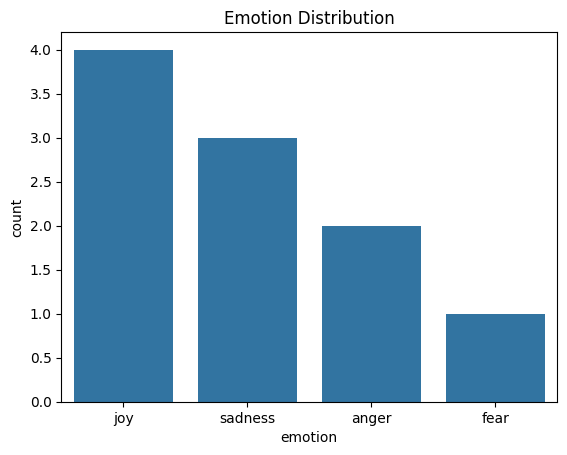

In [3]:
sns.countplot(x='emotion', data=df)
plt.title("Emotion Distribution")
plt.show()


In [4]:
X = df['text']
y = df['emotion']

vectorizer = CountVectorizer()
X_vec = vectorizer.fit_transform(X)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)


In [6]:
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

Classification Report:
              precision    recall  f1-score   support

        fear       0.00      0.00      0.00       1.0
         joy       0.00      0.00      0.00       0.0
     sadness       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0

Confusion Matrix:


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

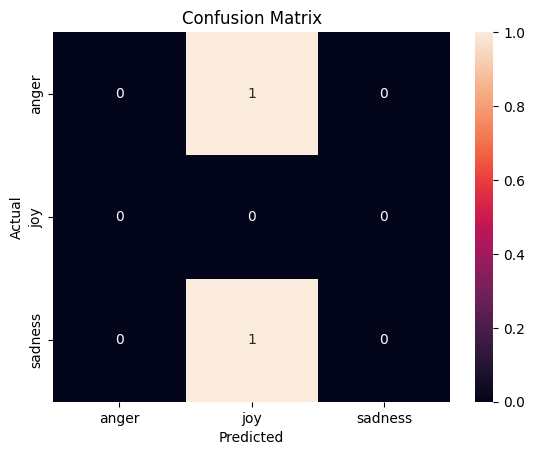

In [7]:
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [8]:
def predict_emotion(text):
    text_vec = vectorizer.transform([text])
    return model.predict(text_vec)[0]

# Test it
print(predict_emotion("I am feeling really low today."))
print(predict_emotion("What a beautiful morning!"))
print(predict_emotion("I hate this!"))


joy
joy
joy


In [9]:
import joblib
joblib.dump(model, 'emotion_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')


['vectorizer.pkl']